# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
# !pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])

In [8]:
df_train.drop(columns = 'dropoff_datetime', inplace = True)

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

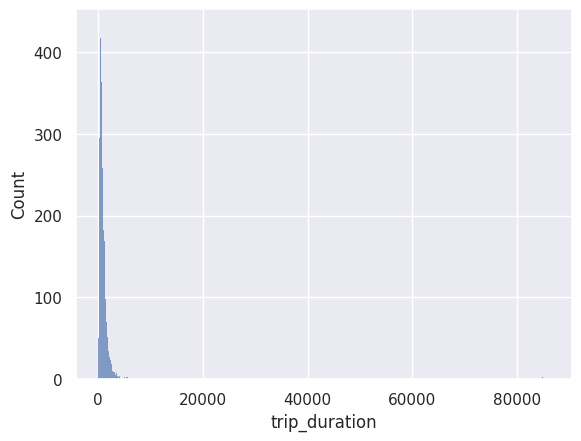

In [9]:
sns.histplot(df_train['trip_duration'].sample(5000));

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Можно увидеть, что значения целевой переменной не отрицательны, они находятся около 0, но есть выбросы

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Для этой задачи важен порядок ошибки, поэтому выбрали RMSLE

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum \limits_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i)) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum \limits_{i=1}^{\ell} \big(\hat{y_i} - \log{(exp(\hat{a(x_i)} - 1) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum \limits_{i=1}^{\ell} \big(\hat{y_i} - \log{(exp(\hat{a(x_i)} }\big)^2}  = \sqrt{\frac{1}{\ell}\sum \limits_{i=1}^{\ell} \big(\hat{y_i} - \hat{a(x_i)} \big)^2} = \sqrt{\text{MSE}(X, \hat{y}, \hat{a})} $

Мы знаем, что минимум корня достигается там же, где минимум функции, то есть не важно оптимизировать RMSLE или корень из RMSE

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [10]:
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'])

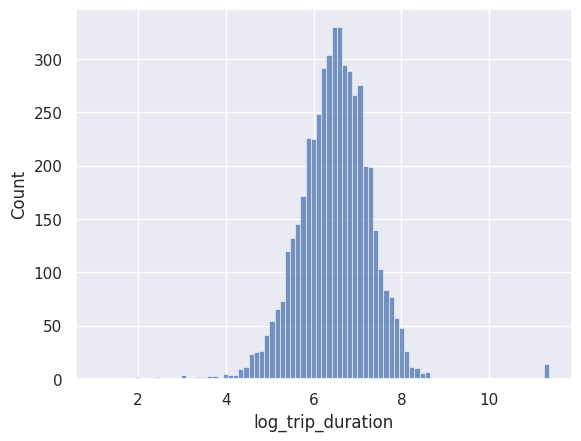

In [11]:
sns.histplot(df_train['log_trip_duration'].sample(5000));

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
import sklearn.metrics

In [13]:
def rmsle(log1p_y_true, log1p_y_pred):
  return sklearn.metrics.mean_squared_error(log1p_y_true, log1p_y_pred, squared=False)

rmsle_best_const = rmsle([df_train['log_trip_duration'].mean()] *df_train['log_trip_duration'].shape[0],df_train['log_trip_duration'] )
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

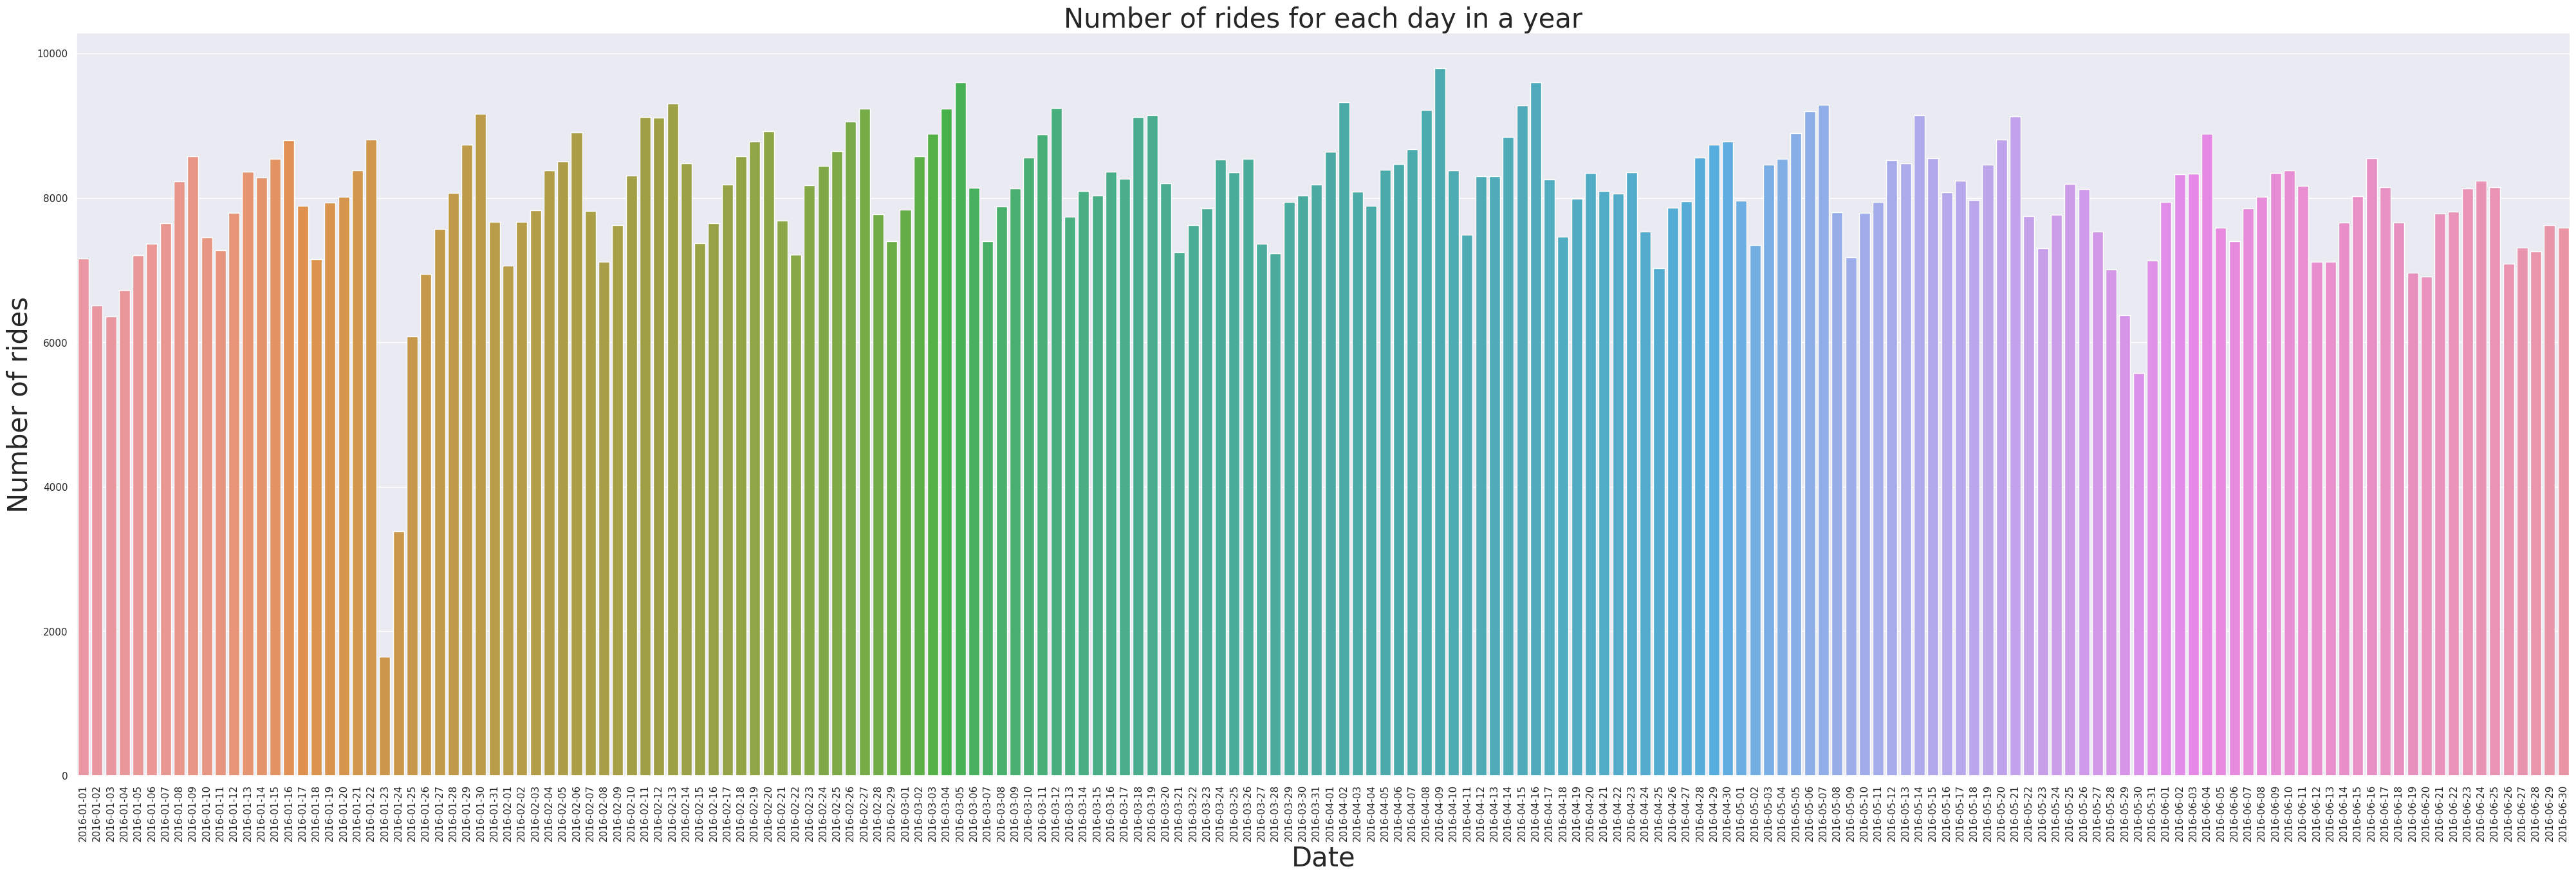

In [14]:
fig = plt.figure(figsize=(50, 15))
graphic = sns.countplot(x=df_train["pickup_datetime"].dt.date.sort_values())
graphic.set_xticklabels(df_train["pickup_datetime"].dt.date.sort_values().unique(), rotation=90)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Number of rides', fontsize=30)
plt.title('Number of rides for each day in a year', fontsize=30);

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

23.01.2016 - 24.01.2016   в Нью-Йорке была снежняя буря, из-за чего движение на машинах было ограничено

второй аномальный период - это 30.05.2016, когда был memorial day и был nba playoff

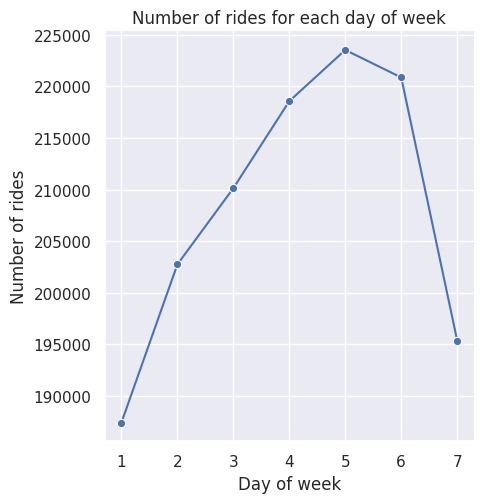

In [15]:
df_train['day_of_week'] = df_train['pickup_datetime'].dt.dayofweek
tmp = df_train.groupby('day_of_week').agg({'day_of_week':'count'}).rename(columns={'day_of_week':'count'}).reset_index()
tmp['day_of_week'] = tmp['day_of_week'] + 1
sns.relplot(data = tmp, x= 'day_of_week', y='count', kind = 'line', marker = 'o')
plt.title('Number of rides for each day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of rides')
plt.show()

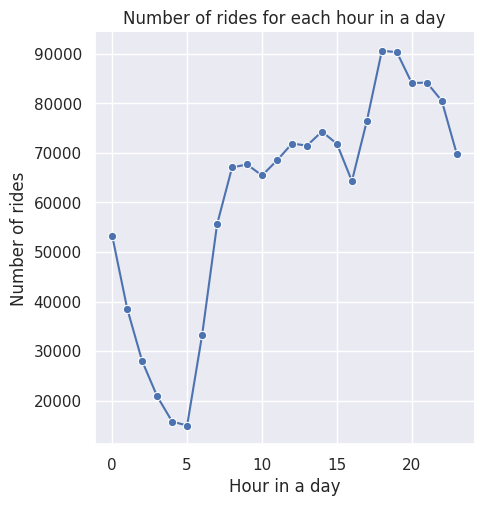

In [16]:
df_train['hour_in_day'] = df_train['pickup_datetime'].dt.hour
tmp = df_train.groupby('hour_in_day').agg({'hour_in_day':'count'}).rename(columns={'hour_in_day':'count'}).reset_index()
sns.relplot(data = tmp, x= 'hour_in_day', y='count', kind = 'line', marker="o")
plt.title('Number of rides for each hour in a day')
plt.xlabel('Hour in a day')
plt.ylabel('Number of rides')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [17]:
df_train['month'] = df_train['pickup_datetime'].dt.month

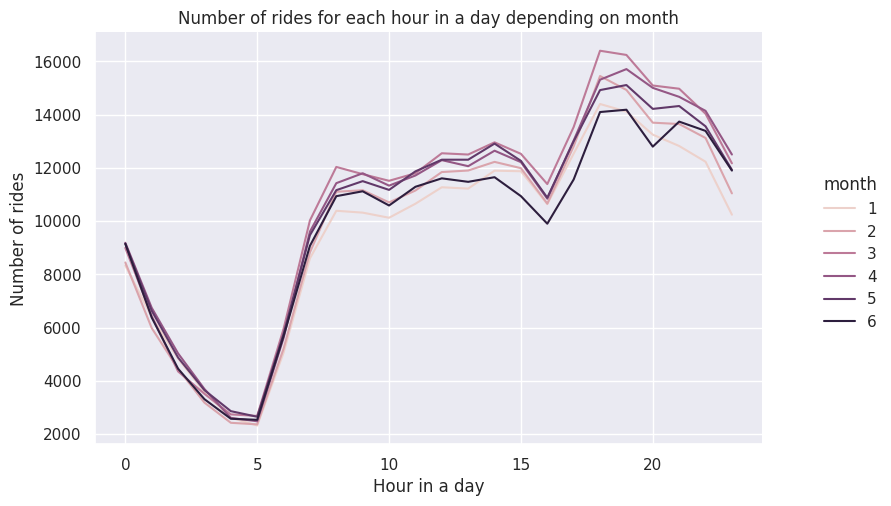

In [18]:
tmp = df_train.groupby(['month','hour_in_day']).agg({'hour_in_day':'count'}).rename(columns={'hour_in_day':'count'}).reset_index()
ax = sns.relplot(data = tmp, x= 'hour_in_day', y='count', kind = 'line',hue = tmp['month'])
plt.title('Number of rides for each hour in a day depending on month')
plt.ylabel('Number of rides')
plt.xlabel('Hour in a day')
ax.figure.set_size_inches(10, 5);
plt.show()

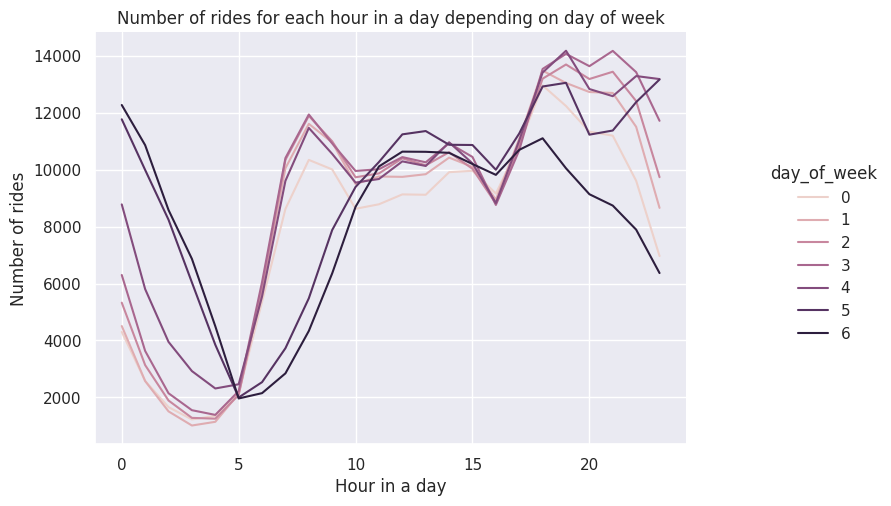

In [19]:
tmp = df_train.groupby(['day_of_week','hour_in_day']).agg({'hour_in_day':'count'}).rename(columns={'hour_in_day':'count'}).reset_index()
ax = sns.relplot(data = tmp, x= 'hour_in_day', y='count', kind = 'line',hue = tmp['day_of_week'])
plt.title('Number of rides for each hour in a day depending on day of week')
plt.ylabel('Number of rides')
plt.xlabel('Hour in a day')
ax.figure.set_size_inches(10, 5);
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?



Как можно увидеть, аномально высокий спрос происходит в 8 утра и 18 вечера, когда люди едут на работу и с работы. Аномально низкий спрос происходит в 4-5 утра, когда все уже приехали с тусовок и спят. По месяцам нельзя сделать точный вывод, поскольку тренды сохрнаяются для всех месяцев.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_train.drop(columns = ['trip_duration', 'log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, df_train[['trip_duration', 'log_trip_duration']], test_size=0.3, random_state=10)

In [22]:
df_train['day_in_year'] = df_train['pickup_datetime'].dt.dayofyear

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики похожи, поскольку количество поездок и время, проведенное в дороге связано через пробки. А именно, чем больше поездок, тем больше машин на дороге, тем медленнее движение, тем больше время поездки. В январе время поездки увеличилось, из-за снежной бури. В мае из-за мемориального дня время в дороге уменьшилось, скорее всего из-за того, что часть дорог была перекрыта

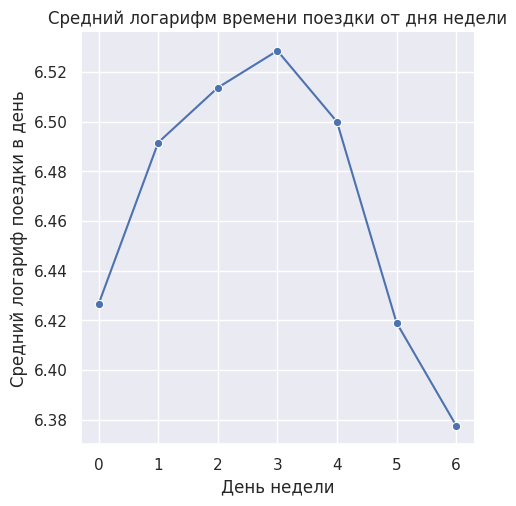

In [23]:
tmp = df_train.groupby(['day_of_week']).agg({'log_trip_duration':'mean'}).rename(columns={'log_trip_duration':'mean_log_duration'}).reset_index()
ax = sns.relplot(data = tmp, x= 'day_of_week', y='mean_log_duration', kind = 'line', marker = 'o')
ax.set( xlabel='День недели', ylabel='Средний логариф поездки в день', title='Средний логарифм времени поездки от дня недели')
ax.figure.set_size_inches(5, 5);

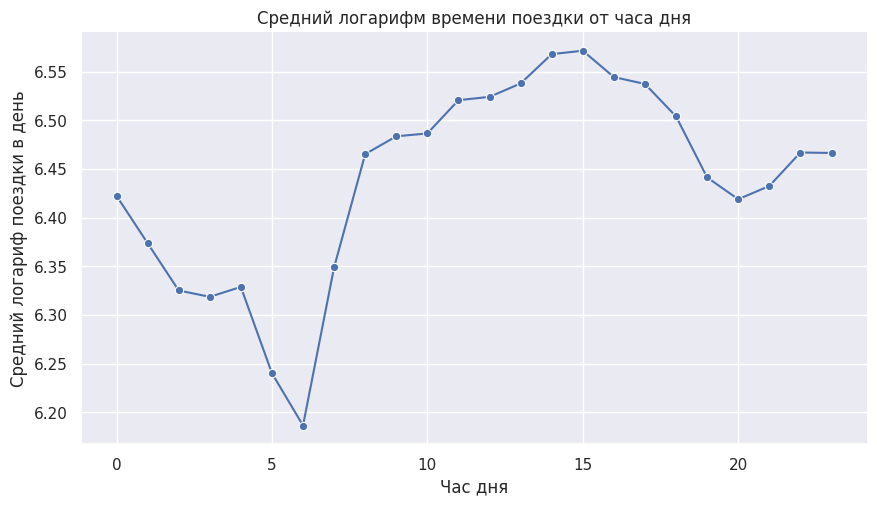

In [24]:
tmp = df_train.groupby(['hour_in_day']).agg({'log_trip_duration':'mean'}).rename(columns={'log_trip_duration':'mean_log_duration'}).reset_index()
ax = sns.relplot(data = tmp, x= 'hour_in_day', y='mean_log_duration', kind = 'line', marker = 'o')
ax.set( xlabel='Час дня', ylabel='Средний логариф поездки в день', title='Средний логарифм времени поездки от часа дня')
ax.figure.set_size_inches(10, 5);

В целом эти графики похожи на графики зависимости нелагорифмированного таргета по тенденции роста и падения функции

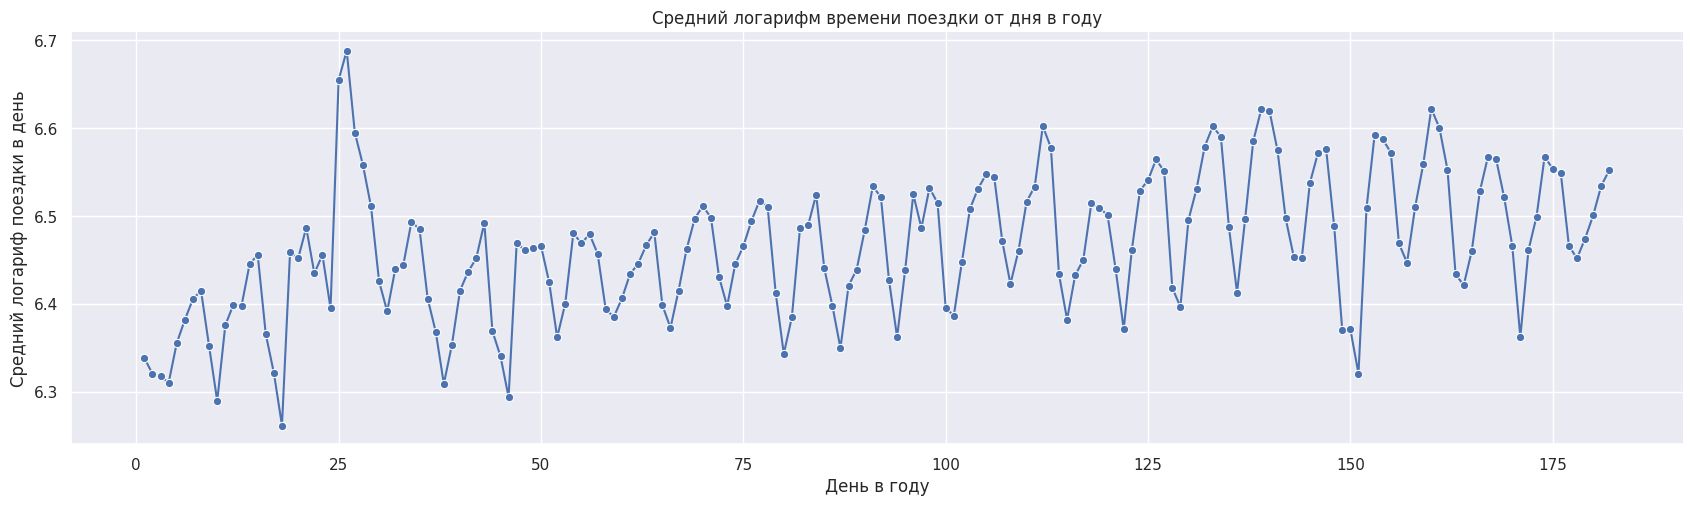

In [25]:

tmp = df_train.groupby(['day_in_year']).agg({'log_trip_duration':'mean'}).rename(columns={'log_trip_duration':'mean_log_duration'}).reset_index()
ax = sns.relplot(data = tmp, x= 'day_in_year', y='mean_log_duration', kind = 'line', marker = 'o')
ax.set(xlabel='День в году', ylabel='Средний логариф поездки в день', title='Средний логарифм времени поездки от дня в году')
ax.figure.set_size_inches(20, 5);

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [26]:
df_train['is_abnormal_1'] = 0
df_train.loc[(df_train['pickup_datetime'].dt.dayofyear == 23) | (df_train['pickup_datetime'].dt.dayofyear ==  24), 'is_abnormal_1'] = 1


df_train['is_abnormal_2'] = 0
df_train.loc[(df_train['pickup_datetime'].dt.dayofyear == 151) , 'is_abnormal_2'] = 1


In [27]:
X_train['is_abnormal_1'] = 0
X_train.loc[(X_train['pickup_datetime'].dt.dayofyear == 23) | (X_train['pickup_datetime'].dt.dayofyear ==  24), 'is_abnormal_1'] = 1


X_train['is_abnormal_2'] = 0
X_train.loc[(X_train['pickup_datetime'].dt.dayofyear == 151) , 'is_abnormal_2'] = 1


X_test['is_abnormal_1'] = 0
X_test.loc[(X_train['pickup_datetime'].dt.dayofyear == 23) | (X_test['pickup_datetime'].dt.dayofyear ==  24), 'is_abnormal_1'] = 1



X_test['is_abnormal_2'] = 0
X_test.loc[(X_test['pickup_datetime'].dt.dayofyear == 151) , 'is_abnormal_2'] = 1

In [28]:
X_train['day_in_year'] = X_train['pickup_datetime'].dt.dayofyear

X_test['day_in_year'] = X_test['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Все признаки, кроме анормальных дней - это категориальные, поскольку у дней недели, месяцев и дня в году есть линейная зависимость между значениями, но наш таргет зависит от этих признаков не настолько линейно. Поэтому мы не можем больше штрафовать, если поезка была совершена в 165 день, чем если бы она была совершена в 2 день

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2']
numeric = ['is_abnormal_1', 'is_abnormal_2']

In [31]:
X_train_new = X_train[['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2']]
y_train_new = y_train['log_trip_duration']

X_test_new = X_test[['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2']]
y_test_new = y_test['log_trip_duration']

In [32]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

simple_pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = simple_pipeline.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
print("Test RMSE = %.4f" % mean_squared_error(y_test_new, y_pred, squared=False))

Test RMSE = 0.7865


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [33]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [34]:
show_circles_on_map(df_train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [35]:
show_circles_on_map(df_train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

На карте выделяются 2 аэропорта: аэропорт Кеннеди и Лагуариан аэропорт. Я выбрала именно их, потому что среднее время поездки до одного из аэропортов будет примерно одинаково, если поездка начиналась в Нью-Йорке. Это значит, что такие 2 признака, как в каком аэропорту началась или закончилась поезка помогут лучше предсказывать время в пути

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [36]:
from sklearn.metrics.pairwise import haversine_distances

In [37]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


df_train.loc[:, 'haversine'] = haversine_array(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, df_train['dropoff_latitude'].values, df_train['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [38]:
df_train['log_haversine'] = np.log1p(df_train['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [39]:
your_df = df_train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [40]:
df_train['mean_speed'] = df_train['haversine'] / df_train['trip_duration']

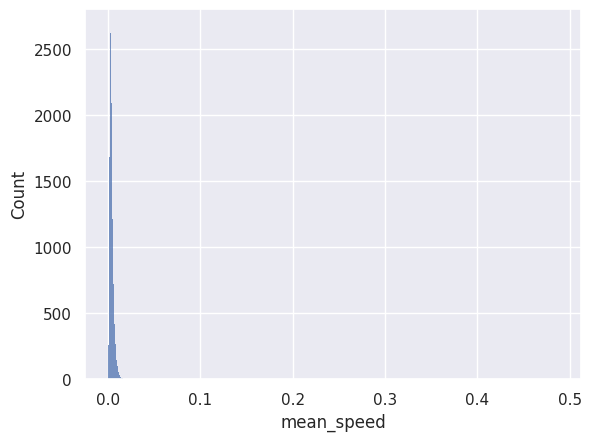

In [41]:
sns.histplot(df_train['mean_speed'].sample(100000));

In [42]:
df_train_copy = df_train.copy()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Будем считать, что разумная средняя скорость - это 72 км/ч и меньше, то есть те скорости, которые меньше 0,02 км/с

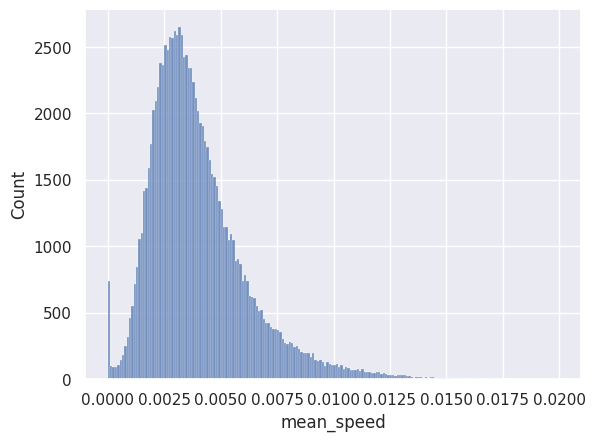

In [43]:
sns.histplot(df_train[df_train['mean_speed'] <= 0.02]['mean_speed'].sample(100000));

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [44]:
for_heat_map = df_train.groupby(['day_of_week', 'hour_in_day']).agg({'mean_speed':'median'}).rename(columns={'mean_speed': 'median_speed'}).reset_index()

<ipython-input-45-b66b9520d3d6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = for_heat_map.pivot('day_of_week','hour_in_day',  'median_speed')


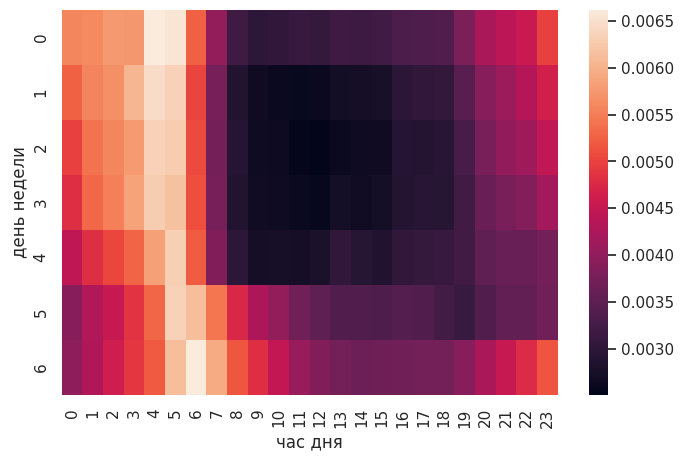

In [45]:
glue = for_heat_map.pivot('day_of_week','hour_in_day',  'median_speed')
ax = sns.heatmap(glue)
ax.set(xlabel="час дня", ylabel="день недели")
ax.figure.set_size_inches(8, 5);

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Мы не можем оставить скорость, поскольку, чтобы ее рассчитать нужно знать время в пути, а именно его мы и пытаемся предсказать

In [46]:
df_train.drop(columns = 'mean_speed', inplace = True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.



Скорость минимальна в будние в 8-15 утра, максимальна в пн-чт в 4-5 утра

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [47]:
df_train['traffic'] = 0
df_train.loc[((0 <= df_train['day_of_week']) & (df_train['day_of_week'] <= 4) \
          & (8 <= df_train['hour_in_day']) & (df_train['hour_in_day'] <= 15)) \
         | ((5 <= df_train['day_of_week']) &(df_train['day_of_week'] <= 6) \
            & (13 <= df_train['hour_in_day'])&( df_train['hour_in_day']<= 18)), 'traffic'] = 1

In [48]:
df_train['free'] = 0
df_train.loc[((0 <= df_train['day_of_week']) & (df_train['day_of_week'] <= 4) \
          & (4 <= df_train['hour_in_day']) & (df_train['hour_in_day'] <= 5)) \
         | ((5 <= df_train['day_of_week']) &(df_train['day_of_week'] <= 6) \
            & (5 <= df_train['hour_in_day'])&( df_train['hour_in_day']<= 6)), 'free'] = 1

In [49]:
df_train_copy['traffic'] = 0
df_train_copy.loc[((0 <= df_train['day_of_week']) & (df_train['day_of_week'] <= 4) \
          & (8 <= df_train['hour_in_day']) & (df_train['hour_in_day'] <= 15)) \
         | ((5 <= df_train['day_of_week']) &(df_train['day_of_week'] <= 6) \
            & (13 <= df_train['hour_in_day'])&( df_train['hour_in_day']<= 18)), 'traffic'] = 1


df_train_copy['free'] = 0
df_train_copy.loc[((0 <= df_train['day_of_week']) & (df_train['day_of_week'] <= 4) \
          & (4 <= df_train['hour_in_day']) & (df_train['hour_in_day'] <= 5)) \
         | ((5 <= df_train['day_of_week']) &(df_train['day_of_week'] <= 6) \
            & (5 <= df_train['hour_in_day'])&( df_train['hour_in_day']<= 6)), 'free'] = 1

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Как я уже писала выше, эти признаки полезны, потому что среднее время поездки до аэропорта Кеннеди будет примерно одинаковым, то же верно и для аэропорта Лагуариан

Возьмем координаты Манхеттена и аэропорта Кеннеди

In [50]:
laguardia_lat_lot = [40.775, -73.875]
kennedy_lat_lot = [40.633333, -73.783333]
radius = 0.0085

In [51]:
df_train['started_laguarian'] = 0
df_train.loc[(np.abs(df_train['pickup_latitude'] - laguardia_lat_lot[0] ) <= radius) \
             & (np.abs(df_train['pickup_longitude'] -laguardia_lat_lot[1] ) <= radius), 'started_laguarian'] = 1

df_train['finished_laguarian'] = 0
df_train.loc[(np.abs(df_train['dropoff_latitude'] - laguardia_lat_lot[0] ) <= radius) \
             & (np.abs(df_train['dropoff_longitude'] -laguardia_lat_lot[1] ) <= radius), 'finished_laguarian'] = 1


df_train['started_kennedy'] = 0
df_train.loc[(np.abs(df_train['pickup_latitude'] - kennedy_lat_lot[0] ) <= radius) \
                             & (np.abs(df_train['pickup_longitude'] - kennedy_lat_lot[1] ) <= radius), 'started_kennedy'] = 1

df_train['finished_kennedy'] = 0
df_train.loc[(np.abs(df_train['dropoff_latitude'] - kennedy_lat_lot[0] ) <= radius) \
             & (np.abs(df_train['dropoff_longitude'] - kennedy_lat_lot[1] ) <= radius), 'finished_kennedy'] = 1

In [52]:
df_train_copy['started_laguarian'] = 0
df_train_copy.loc[(np.abs(df_train['pickup_latitude'] - laguardia_lat_lot[0] ) <= radius) \
             & (np.abs(df_train['pickup_longitude'] -laguardia_lat_lot[1] ) <= radius), 'started_laguarian'] = 1

df_train_copy['finished_laguarian'] = 0
df_train_copy.loc[(np.abs(df_train['dropoff_latitude'] - laguardia_lat_lot[0] ) <= radius) \
             & (np.abs(df_train['dropoff_longitude'] -laguardia_lat_lot[1] ) <= radius), 'finished_laguarian'] = 1


df_train_copy['started_kennedy'] = 0
df_train_copy.loc[(np.abs(df_train['pickup_latitude'] - kennedy_lat_lot[0] ) <= radius) \
                             & (np.abs(df_train['pickup_longitude'] - kennedy_lat_lot[1] ) <= radius), 'started_kennedy'] = 1

df_train_copy['finished_kennedy'] = 0
df_train_copy.loc[(np.abs(df_train['dropoff_latitude'] - kennedy_lat_lot[0] ) <= radius) \
             & (np.abs(df_train['dropoff_longitude'] - kennedy_lat_lot[1] ) <= radius), 'finished_kennedy'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='finished_kennedy', ylabel='log_trip_duration'>

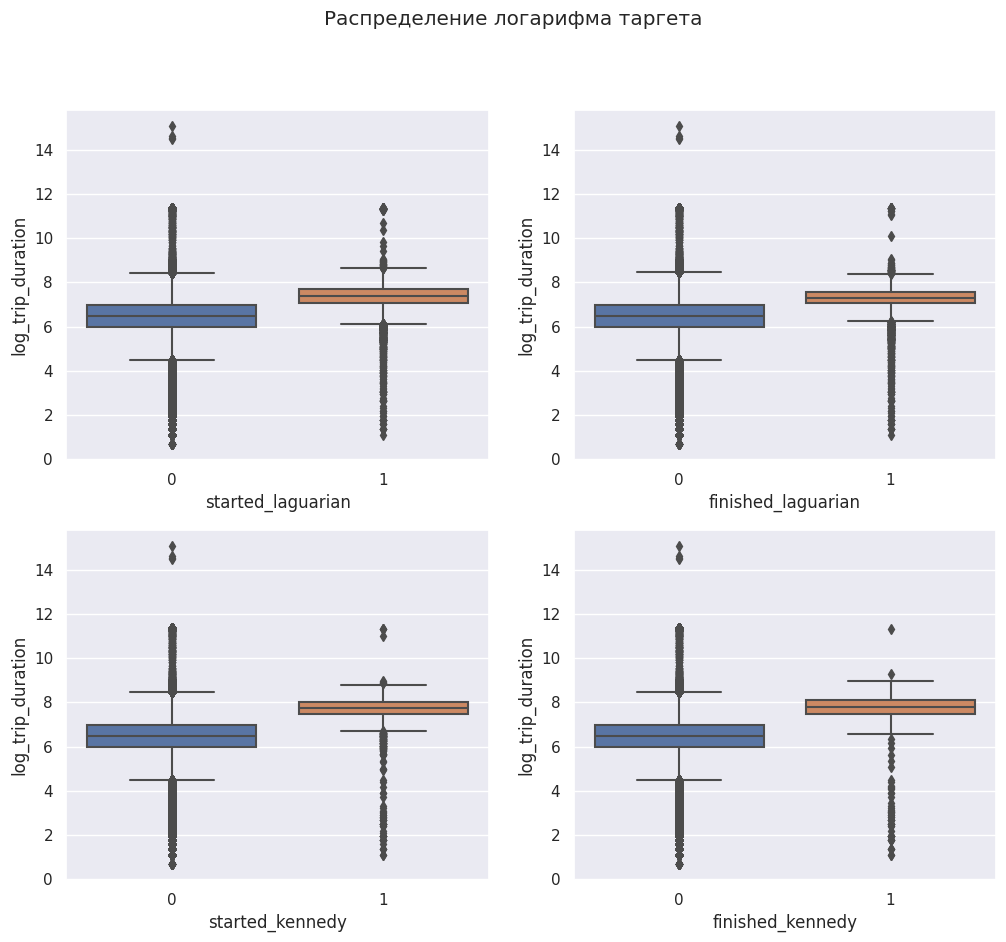

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Распределение логарифма таргета ')
sns.boxplot(ax=axes[0, 0],data = df_train, x = 'started_laguarian', y = 'log_trip_duration')
sns.boxplot(ax=axes[0, 1],data = df_train, x = 'finished_laguarian', y = 'log_trip_duration')
sns.boxplot(ax=axes[1, 0],data = df_train, x = 'started_kennedy', y = 'log_trip_duration')
sns.boxplot(ax=axes[1, 1],data = df_train, x = 'finished_kennedy', y = 'log_trip_duration')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Среднее у поездок, которые начались в одном из аэропортов или закончились в одном их аэропортов одинаковое, это значит, что мы в дальнейшем можем объединить эти 2 признака в 1, но есть много выбросов

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, upper_left,down_right , num_vert, num_hor):
        self.upper_left = upper_left
        self.down_right = down_right
        self.vec_of_coords = []
        self.num_vert = num_vert
        self.num_hor = num_hor
        self.len_vert = upper_left[0] - down_right[0]
        self.len_hor = upper_left[1] - down_right[1]
        self.step_hor = self.len_hor / num_hor
        self.step_vert = self.len_vert / num_vert
        for step_x in range(self.num_vert):
          for step_y in range(self.num_hor):
            lat_upper = self.upper_left[0] + self.step_hor * (step_x + 1)
            lot_upper = self.upper_left[1] + self.step_vert * (step_y + 1)
            lat_down = self.upper_left[0] + self.step_hor * step_x
            lot_down = self.upper_left[1] + self.step_vert * step_y
            self.vec_of_coords.append(((lat_upper, lot_upper), (lat_down, lot_down)))


    def show_map(self, data):
      X = data.copy()
      location = (X['pickup_latitude'].mean(), X['pickup_longitude'].mean())
      m = folium.Map(location=location)
      for i in range(len(self.vec_of_coords)):
        folium.Rectangle(
                    [self.vec_of_coords[i]],
                    color='red',
                ).add_to(m)
      return m

    def fit(self, X=None, y=None):
        return self



    def transform(self, X, y=None):
      X_copy = X.copy()
      X_copy['pickup_in_rect'] = -1
      X_copy['dropoff_in_rect'] = -1
      for i in range(len(self.vec_of_coords)):
        # vec_of_coords[i][0] -- upper left
        # vec_of_coords[i][1] -- down right
        X_copy.loc[(X_copy['pickup_latitude'] >= self.vec_of_coords[i][0][0]) & (X_copy['pickup_latitude'] <= self.vec_of_coords[i][1][0])
        & (X_copy['pickup_longitude'] <= self.vec_of_coords[i][0][1]) & (X_copy['pickup_longitude'] >= self.vec_of_coords[i][1][1]), 'pickup_in_rect'] = i
        X_copy.loc[(X_copy['dropoff_latitude'] >= self.vec_of_coords[i][0][0]) & (X_copy['dropoff_latitude'] <= self.vec_of_coords[i][1][0])
        & (X_copy['dropoff_longitude'] <= self.vec_of_coords[i][0][1]) & (X_copy['dropoff_longitude'] >= self.vec_of_coords[i][1][1]), 'dropoff_in_rect'] = i
      X = X_copy

      return X

In [55]:
upper_left = [40.803722, -74.017166]
down_right = [40.711081379860886, -73.95596895554517]

test = MapGridTransformer(upper_left, down_right, 4, 3)
res = test.transform(df_train.sample(1000))


In [56]:

location = (df_train['pickup_latitude'].mean(), df_train['pickup_longitude'].mean())
m = folium.Map(location=location)
color = [
            'lightblue',
            'gray',
            'darkred',
            'lightred',
            'blue',
            'beige',
            'green',
            'darkgreen',
            'darkblue',
            'red',
            'lightgreen',
            'purple',
            'orange']

for i in range(len(test.vec_of_coords)):
  folium.Rectangle(
              [test.vec_of_coords[i]],
          ).add_to(m)
for _, row in res.iterrows():
  folium.Circle(
      radius=100,
      location=(row['pickup_latitude'], row['pickup_longitude']),

      color=color[row['pickup_in_rect']],
      fill_color=color[row['pickup_in_rect']],
      # fill=True
  ).add_to(m)
m

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [57]:
X = df_train.drop(columns = ['trip_duration', 'log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, df_train['log_trip_duration'], test_size=0.3, random_state=10)

In [58]:
test = MapGridTransformer(upper_left, down_right, 4, 3)
X_train_after_transform = test.transform(X_train)
X_test_after_transform = test.transform(X_test)
df_train = test.transform(df_train)

In [59]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']

X_train_new = X_train_after_transform[categorical + numeric]
y_train_new = y_train

X_test_new = X_test_after_transform[categorical + numeric]
y_test_new = y_test

In [60]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

simple_pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = simple_pipeline.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
print("Test RMSE = %.4f" % mean_squared_error(y_test_new, y_pred, squared=False))

Test RMSE = 0.4836


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [61]:
df_train['vendor_id'].nunique()

2

In [62]:
df_train['passenger_count'].nunique()

10

In [63]:
df_train['store_and_fwd_flag'].nunique()

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

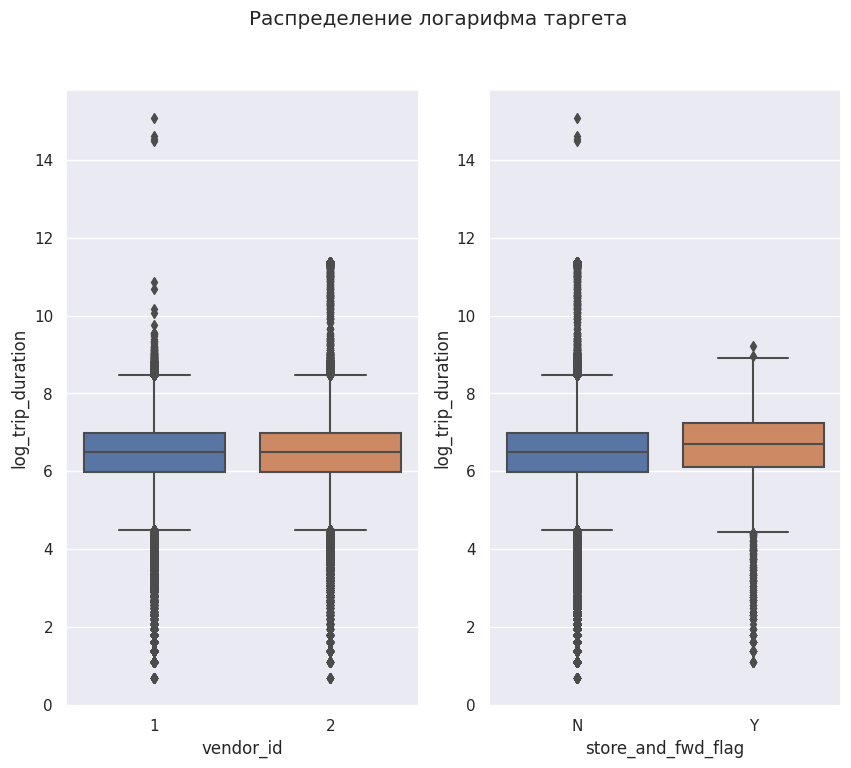

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Распределение логарифма таргета ')
sns.boxplot(ax=axes[0],data = df_train, x = 'vendor_id', y = 'log_trip_duration')
sns.boxplot(ax=axes[1],data = df_train, x = 'store_and_fwd_flag', y = 'log_trip_duration')

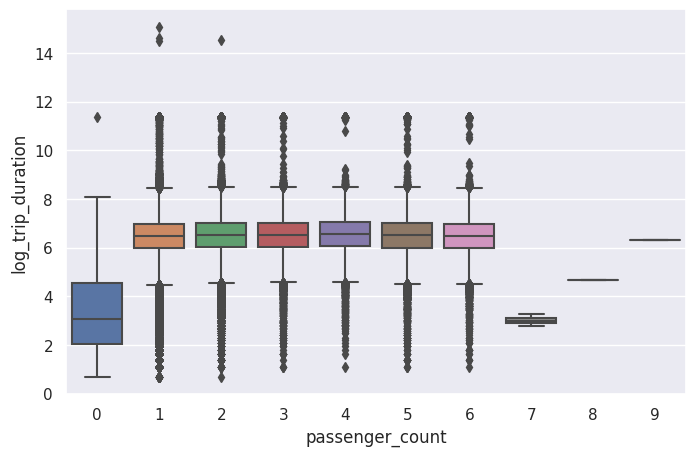

In [65]:
ax = sns.boxplot(data = df_train, x = 'passenger_count', y = 'log_trip_duration')
ax.figure.set_size_inches(8, 5);

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [66]:
df_train['vendor_id'] -= 1
df_train['vendor_id'].unique()

array([1, 0])

In [67]:
df_train.loc[df_train['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1
df_train.loc[df_train['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0

In [68]:
df_train['store_and_fwd_flag'].unique()

array([0, 1], dtype=object)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Эти признаки бесполезные, поскольку при изменении значения признака наш таргет совсем не меняется

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [69]:
X = df_train.drop(columns = ['trip_duration', 'log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, df_train['log_trip_duration'], test_size=0.3, random_state=10)
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
numeric = ['log_haversine']

X_train_new = X_train_after_transform[categorical + numeric]
y_train_new = y_train

X_test_new = X_test_after_transform[categorical + numeric]
y_test_new = y_test

In [70]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

simple_pipeline = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = simple_pipeline.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
print("Test RMSE = %.4f" % mean_squared_error(y_test_new, y_pred, squared=False))

Test RMSE = 0.4956


Как мы и видим RMSE почти не изменилась

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [71]:
df_train.drop(columns=['passenger_count', 'store_and_fwd_flag', 'vendor_id'], inplace=True)

In [72]:
df_train_copy.drop(columns=['passenger_count', 'store_and_fwd_flag', 'vendor_id'], inplace=True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [73]:
X = df_train_copy

X_train_before, X_test_before, y_train, y_test = train_test_split(X, df_train_copy[['trip_duration', 'log_trip_duration']], test_size=0.3, random_state=10)

In [74]:
test = MapGridTransformer(upper_left, down_right, 4, 3)
X_train = test.transform(X_train_before)
X_test = test.transform(X_test_before)

<Axes: xlabel='log_trip_duration', ylabel='Count'>

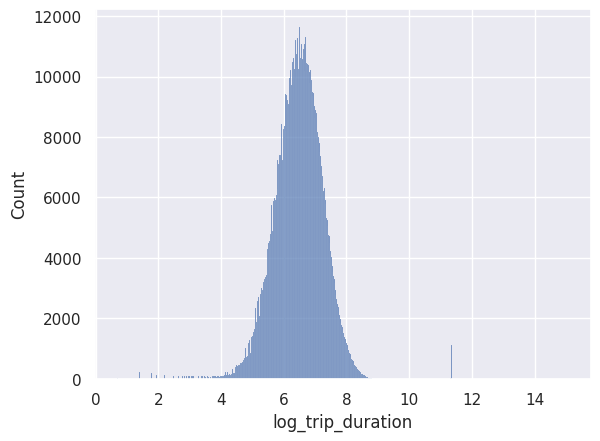

In [75]:
sns.histplot(X_train['log_trip_duration'])

<Axes: xlabel='log_haversine', ylabel='Count'>

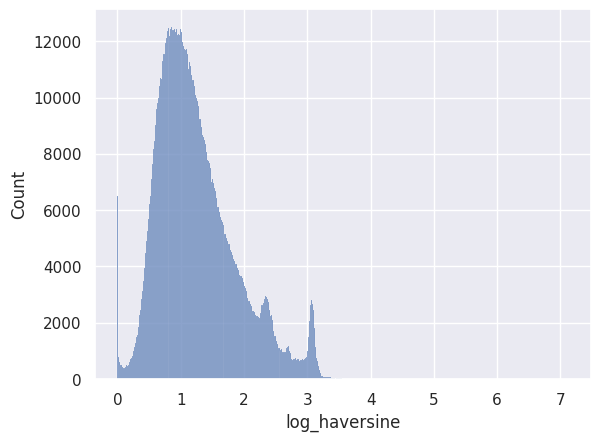

In [76]:
sns.histplot(X_train['log_haversine'])

In [77]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy','pickup_in_rect', 'dropoff_in_rect' ]
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])

X_train['reg_residual'] = model.predict(X_train[categorical + numeric]) - X_train['log_trip_duration']

<Axes: xlabel='reg_residual', ylabel='Count'>

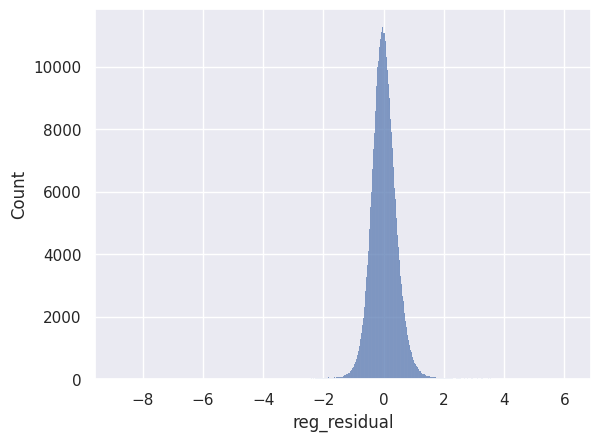

In [79]:
sns.histplot(X_train['reg_residual'])

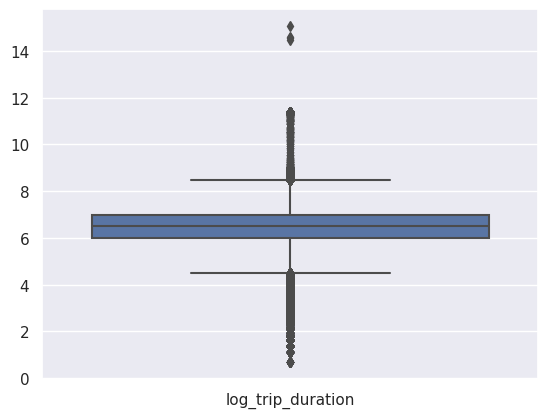

In [80]:
ax = sns.boxplot(pd.DataFrame(X_train['log_trip_duration']))

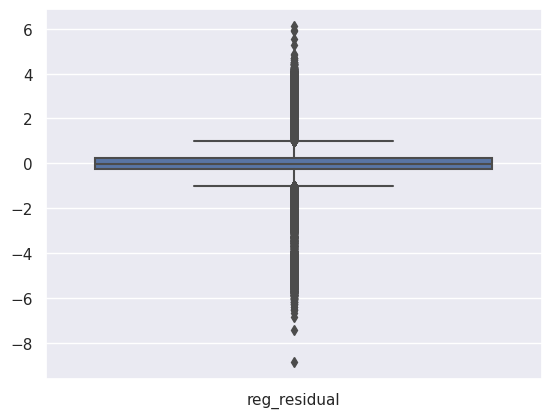

In [81]:
ax = sns.boxplot(pd.DataFrame(X_train['reg_residual']))

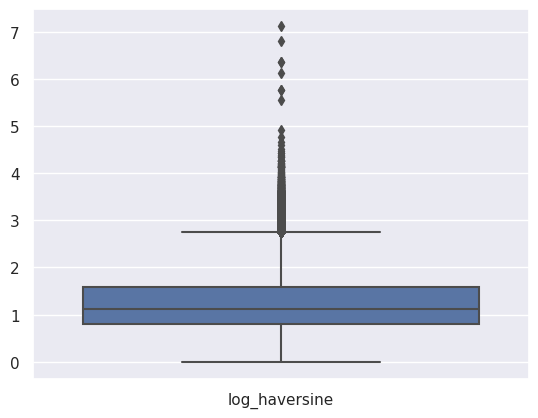

In [ ]:
ax = sns.boxplot(pd.DataFrame(X_train['log_haversine']))

In [82]:
X_train = X_train[(X_train['log_trip_duration'] > 4.5 )&(X_train['log_trip_duration'] < 8.5)]

In [83]:
X_train = X_train[(X_train['reg_residual'] < 2) & (X_train['reg_residual'] > -2) ]

In [84]:
X_train = X_train[X_train['log_haversine'] < 3.5]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [85]:
X_train[X_train['is_abnormal_1'] == 1].count()[0]

3484

In [86]:
X_train[X_train['is_abnormal_2'] == 1].count()[0]

3817

In [87]:
X_train['abnormal'] = X_train['is_abnormal_1'] | X_train['is_abnormal_2']

In [88]:
X_test['abnormal'] = X_test['is_abnormal_1'] | X_test['is_abnormal_2']

In [89]:
df_train['abnormal'] = df_train['is_abnormal_1'] | df_train['is_abnormal_2']


In [90]:
X_train[X_train['started_laguarian'] == 1].count()[0]

13723

In [91]:
X_train[X_train['finished_laguarian'] == 1].count()[0]

6964

In [92]:
X_train[X_train['started_kennedy'] == 1].count()[0]

1188

In [93]:
X_train[X_train['finished_kennedy'] == 1].count()[0]

330

In [95]:
X_train['laguarian'] = X_train['finished_laguarian'] | X_train['started_laguarian']

In [96]:
X_test['laguarian'] = X_test['finished_laguarian'] | X_test['started_laguarian']

In [97]:
X_train['kennedy'] = X_train['started_kennedy'] | X_train['finished_kennedy']

In [98]:
X_test['kennedy'] = X_test['started_kennedy'] | X_test['finished_kennedy']

In [99]:
df_train['laguarian'] = df_train['finished_laguarian'] | df_train['started_laguarian']
df_train['kennedy'] = df_train['started_kennedy'] | df_train['finished_kennedy']

это редкая категория, объединим ее в один столбец

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [100]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'abnormal', 'traffic', 'free', 'laguarian', 'kennedy', 'pickup_in_rect', 'dropoff_in_rect' ]

In [101]:
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])

y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4849


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [102]:
X_train[categorical].shape[1]

11

In [103]:
X_train[categorical].nunique().sum()

255

Было 11 колонок, стало 255 после one-hot-encoding

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [104]:
from sklearn.linear_model import Lasso

In [105]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])

y_pred = model.predict(X_test)
print("Test RMSE = %.4f after Lasso" % mean_squared_error(y_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.7945 after Lasso


Ошибка после Lasso регрессии сильно хуже, чем Ridge

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
X_train_with_val, X_val, y_train, y_val = train_test_split(X_train, X_train['log_trip_duration'], test_size=0.2, random_state=10)

In [109]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']

alphas = np.logspace(-5, 5, 11)
cv_ridge = GridSearchCV(Ridge(), [{"alpha" : alphas}], scoring = "neg_root_mean_squared_error", cv = 5, n_jobs =-1, verbose =1)


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ("cv", cv_ridge)
])

model_ridge = pipeline.fit(X_train_with_val[categorical + numeric], X_train_with_val['log_trip_duration'])

best_alpha = cv_ridge.best_params_["alpha"]
y_pred = model_ridge.predict(X_val[categorical + numeric])

print("Best alpha for Ridge= %.6f" % best_alpha)
print("Val RMSE = %.4f after Ridge" % mean_squared_error(y_val, y_pred, squared=False))
print(f"Best resutl on train {-cv_ridge.best_score_}")


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best alpha for Ridge= 10.000000
Val RMSE = 0.3983 after Ridge
Best resutl on train 0.39664989277069856


In [110]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ('regression', Ridge(12.9))
])
model_ridge = pipeline.fit(X_train_with_val[categorical + numeric], X_train_with_val["log_trip_duration"])

y_pred = model_ridge.predict(X_test[categorical + numeric])


print("Test RMSE = %.4f after Ridge regression" % mean_squared_error(y_test['log_trip_duration'], y_pred, squared=False))

Test RMSE = 0.4849 after Ridge regression


In [112]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

alphas = np.logspace(-1, 1, 11)
cv_lasso = GridSearchCV(Lasso(), [{"alpha" : alphas}], scoring = "neg_root_mean_squared_error", cv = 5, n_jobs =-1, verbose =1)
pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ("cv", cv_lasso)
])
model = pipeline.fit(X_train_with_val[categorical + numeric], X_train_with_val["log_trip_duration"])


best_alpha = cv_lasso.best_params_["alpha"]
y_pred = model.predict(X_val[categorical + numeric])

print("Best alpha for Lasso= %.6f" % best_alpha)
print("Val RMSE = %.4f after Lasso" % mean_squared_error(y_val, y_pred, squared=False))
print(f"Best resutl on train {-cv_lasso.best_score_}")


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best alpha for Lasso= 0.100000
Val RMSE = 0.4551 after Lasso
Best resutl on train 0.4536275032420587


In [113]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])

pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ('regression', Lasso(0.1))
])
model = pipeline.fit(X_train_with_val[categorical + numeric], X_train_with_val["log_trip_duration"])

y_pred = model.predict(X_test[categorical + numeric])


print("Test RMSE = %.4f after Lasso regression" % mean_squared_error(y_test['log_trip_duration'], y_pred, squared=False))



Test RMSE = 0.5420 after Lasso regression


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [114]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect']
numeric = ['log_haversine']

alphas = np.logspace(-1, 1, 11)
number_of_zero_weights = []
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])
for alpha in alphas:
  pipeline = Pipeline(steps=[
      ("ohe_and_scale", column_transformer),
      ('regression', Lasso(alpha))
  ])
  model_lasso = pipeline.fit(X_train_with_val[categorical + numeric], X_train_with_val["log_trip_duration"])
  number_of_zero_weights.append(np.count_nonzero(model_lasso['regression'].coef_==0.0))


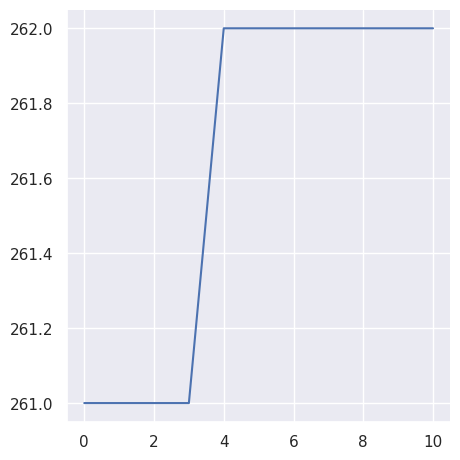

In [115]:
ax = sns.relplot(number_of_zero_weights, kind = 'line')

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Этот признак может быть потенциально полезным, потому что среднее время поездки из одной ячейки в другую - это очень легко предсказуемая величина. Так как в центре манхеттена происходит очень много поездок, то модель скорее будет использовать дургие признаки, чем в огромном датасете искать зависимости между 2 колонками

In [116]:
same_path = df_train.loc[(df_train['pickup_in_rect'] != -1) & (df_train['dropoff_in_rect'] != -1)].groupby(['pickup_in_rect', 'dropoff_in_rect']).agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False).head(100).reset_index()

df_train.loc[:, 'same_path'] = -1
for i in range(100):
    df_train.loc[(df_train['pickup_in_rect'] == same_path.loc[i, 'pickup_in_rect']) & (df_train['dropoff_in_rect'] == same_path.loc[i, 'dropoff_in_rect']), 'same_path'] = i

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train[ 'log_trip_duration'], test_size=0.3, random_state=10)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [118]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'is_abnormal_1', 'is_abnormal_2', 'traffic', 'free', \
               'started_laguarian', 'finished_laguarian', 'started_kennedy', 'finished_kennedy', 'pickup_in_rect', 'dropoff_in_rect', 'same_path']
numeric = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])
pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ('regression', Ridge(10))
])
model_ridge = pipeline.fit(X_train[categorical + numeric], X_train["log_trip_duration"])

y_pred = model_ridge.predict(X_test[categorical + numeric])


print("Test RMSE = %.4f after Ridge regression" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4732 after Ridge regression


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [119]:
from numpy.linalg import norm

In [120]:
ox = np.array([[40.745945, -73.986412], [40.746863, -73.985737]])
oy = np.array([[40.745945, -73.986412],[40.746309, -73.987287]])
main_vec_ox = (ox[1] - ox[0])
main_vec_oy = (oy[1] - oy[0])

In [121]:
import numpy as np

def distance_point_to_vector(point, vector):
    point = np.array(point)
    vector = np.array(vector)
    normalized_vector = vector / np.linalg.norm(vector)
    projection = np.dot(point, normalized_vector) * normalized_vector
    distance = np.linalg.norm(point - projection)
    return distance * 275
# 275 - подобранный коэффициент

def manhattan_distance(x1, y1, x2, y2):
  return np.abs(x1- x2) + np.abs(y1 - y2)


In [122]:
df_train['pickup_y'] = df_train[['pickup_latitude', 'pickup_longitude']].apply(lambda x: distance_point_to_vector(x.to_numpy(), main_vec_ox), axis=1)
df_train['pickup_x'] = df_train[['pickup_latitude', 'pickup_longitude']].apply(lambda x: distance_point_to_vector(x.to_numpy(), main_vec_oy), axis=1)
df_train['dropoff_y'] = df_train[['dropoff_latitude', 'dropoff_longitude']].apply(lambda x: distance_point_to_vector(x.to_numpy(), main_vec_ox), axis=1)
df_train['dropoff_x'] = df_train[['dropoff_latitude', 'dropoff_longitude']].apply(lambda x: distance_point_to_vector(x.to_numpy(), main_vec_oy), axis=1)

<Axes: >

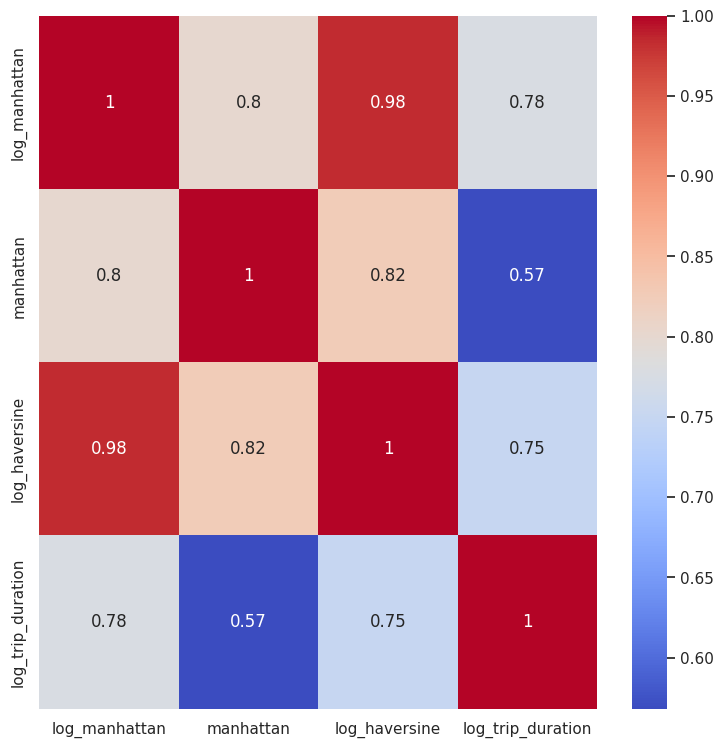

In [123]:
df_train['manhattan'] = manhattan_distance(df_train['pickup_x'].to_numpy(), df_train['pickup_y'].to_numpy(), df_train['dropoff_x'].to_numpy(), df_train['dropoff_y'].to_numpy())
df_train
df_train['log_manhattan'] = np.log1p(df_train['manhattan'])
sns.set(rc = {'figure.figsize':(9,9)})
sns.heatmap(df_train[['log_manhattan', 'manhattan', 'log_haversine', 'log_trip_duration']].corr(), annot=True, fmt='.2g', cmap='coolwarm')

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [124]:
X = df_train.drop(columns = ['trip_duration', 'log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, df_train['log_trip_duration'], test_size=0.3, random_state=10)

In [125]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'abnormal',   'traffic', 'free', \
               'laguarian', 'kennedy', 'pickup_in_rect', 'dropoff_in_rect', 'same_path']
numeric = ['log_manhattan']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])
pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ('regression', Ridge(10))
])
model_ridge = pipeline.fit(X_train[categorical + numeric], y_train)

y_pred = model_ridge.predict(X_test[categorical + numeric])


print("Test RMSE = %.4f after Ridge regression" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4492 after Ridge regression


Стало сильно лучше, потому что машины не могут ездить сквозь дома, а для Манхеттена очень хорошо подходит расстояние, которое мерит все прямоугольниками

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [126]:
!pip install h3
!pip install h3pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h3pandas: filename=h3pandas-0.2.4-py3-none-any.whl size=17657 sha256=1296f5703fd149eac4257a938e01c9a2053d0f3a5e48c30d5b88b491205f8109
  Stored in directory: /root/.cache/pip/wheels/b7/c1/a1/cfc5bbcd909a037e628ab0bb3717f72f9a2e599f0cfb322520
Successfully built h3pandas


In [127]:
import h3pandas

In [135]:
pickup = df_train[['id', 'pickup_longitude',  'pickup_latitude']].rename(columns={'pickup_longitude': 'lng', 'pickup_latitude': 'lat'})
dropoff = df_train[['id', 'dropoff_longitude', 'dropoff_latitude']].rename(columns={'dropoff_longitude': 'lng', 'dropoff_latitude': 'lat'})
for_pickup = pickup.h3.geo_to_h3(10).reset_index()
for_dropoff = dropoff.h3.geo_to_h3(10).reset_index()
for_pickup = for_pickup.rename(columns = {'h3_10': 'h3_pickup'})
for_dropoff = for_dropoff.rename(columns = {'h3_10': 'h3_dropoff'})

In [136]:
tmp = pd.merge(df_train, for_pickup, how='left', on='id')
new_train = pd.merge(tmp, for_dropoff, how='left', on='id')

In [138]:
X_train, X_test, y_train, y_test = train_test_split(new_train, new_train['log_trip_duration'], test_size=0.3, random_state=10)

In [139]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'abnormal',   'traffic', 'free', \
               'laguarian', 'kennedy', 'pickup_in_rect', 'dropoff_in_rect', 'same_path', 'h3_pickup', 'h3_dropoff']
numeric = ['log_manhattan', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])
pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ('regression', Ridge(10))
])
model_ridge = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])

y_pred = model_ridge.predict(X_test[categorical + numeric])


print("Test RMSE = %.4f after Ridge regression" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4316 after Ridge regression


Сделаем 100 самых часто посещаемых шестиугольников

In [140]:
same_path = new_train.loc[(new_train['h3_pickup'] != -1) & (new_train['h3_dropoff'] != -1)].groupby(['h3_pickup', 'h3_dropoff']).agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False).head(100).reset_index()

new_train.loc[:, 'same_path_h3'] = -1
for i in range(100):
    new_train.loc[(new_train['h3_pickup'] == same_path.loc[i, 'h3_pickup']) & (new_train['h3_dropoff'] == same_path.loc[i, 'h3_dropoff']), 'same_path_h3'] = i

В наших данных много поездок, которые начались и закончились в одной и той же точке, то есть пройденное расстояние нулевое, а время поездки не нулевое, введем для этого новую категорию

In [143]:
new_train['start_and_stop_same'] = -1
new_train.loc[(new_train['pickup_latitude'] == new_train['dropoff_latitude']) & (new_train['pickup_longitude'] == new_train['dropoff_longitude']), 'start_and_stop_same'] = 0

In [144]:
X_train, X_test, y_train, y_test = train_test_split(new_train, new_train['log_trip_duration'], test_size=0.3, random_state=10)

In [145]:
categorical = ['day_of_week', 'hour_in_day', 'month', 'day_in_year', 'abnormal', 'traffic', 'free', \
               'laguarian', 'kennedy', 'pickup_in_rect', 'dropoff_in_rect', 'same_path', 'h3_pickup', 'h3_dropoff', 'same_path_h3', 'start_and_stop_same']
numeric = ['log_manhattan', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)

])
pipeline = Pipeline(steps=[
    ("ohe_and_scale", column_transformer),
    ('regression', Ridge(10))
])
model_ridge = pipeline.fit(X_train[categorical + numeric], X_train['log_trip_duration'])

y_pred = model_ridge.predict(X_test[categorical + numeric])


print("Test RMSE = %.4f after Ridge regression" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4271 after Ridge regression


Получили улучшение ошибки на 0,0221 по сравнению с 16 заданием

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.